In [1]:
import pandas as pd
from pandas import Series,DataFrame 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn import preprocessing

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [7]:
# missing value imputation
for col in train:
    if train[col].dtype == 'object':
        train[col] = train[col].fillna(train[col].mode())
    else:
        train[col] = train[col].fillna(train[col].median())

In [8]:
#label encoding 
from sklearn.preprocessing import LabelEncoder
def label_encoding(df_train,df_test):
    le_count=0;
    for col in df_train:
        if df_train[col].dtype == 'object':
            if len(list(df_train[col].unique())) <= 2:
                le = LabelEncoder()
                le.fit(list(df_train[col].unique())+list(df_test[col].unique()))
                df_train[col] = le.transform(df_train[col].astype(str))
                df_test[col] = le.transform(df_test[col].astype(str))
                le_count +=1;

In [9]:
import copy
train_objs_num = len(train)
dataset = pd.concat(objs=[train, test], axis=0)
dataset = pd.get_dummies(dataset)
train = copy.copy(dataset[:train_objs_num])
test = copy.copy(dataset[train_objs_num:])
test = test.drop(['SalePrice'],axis=1)

C:\Users\pathak\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


(1459, 289)

C:\Users\pathak\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


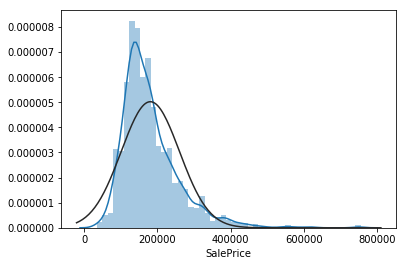

In [10]:
from scipy.stats import norm
sns.distplot(train['SalePrice'],fit=norm)

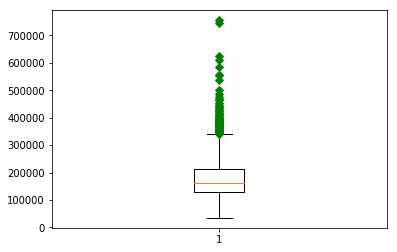

In [11]:
# Boxplot for checking outliers
plt.boxplot(train["SalePrice"].values,sym='gD');

In [21]:
corr = train.corr()
corr = corr.sort_values('SalePrice')
cols = corr['SalePrice'][corr['SalePrice'].values > 0.2].index.values
#cols
#corr = numerical_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:], '\n')

SalePrice                1.000000
OverallQual              0.790982
GrLivArea                0.708624
GarageCars               0.640409
GarageArea               0.623431
TotalBsmtSF              0.613581
1stFlrSF                 0.605852
FullBath                 0.560664
BsmtQual_Ex              0.553105
TotRmsAbvGrd             0.533723
YearBuilt                0.522897
YearRemodAdd             0.507101
KitchenQual_Ex           0.504094
Foundation_PConc         0.497734
MasVnrArea               0.472614
Fireplaces               0.466929
GarageYrBlt              0.466754
ExterQual_Gd             0.452466
ExterQual_Ex             0.451164
BsmtFinType1_GLQ         0.434597
HeatingQC_Ex             0.434543
GarageFinish_Fin         0.419678
Neighborhood_NridgHt     0.402149
BsmtFinSF1               0.386420
SaleType_New             0.357509
SaleCondition_Partial    0.352060
FireplaceQu_Gd           0.339582
GarageType_Attchd        0.335961
LotFrontage              0.334771
MasVnrType_Sto

In [13]:
train_label = train['SalePrice']
cols = np.delete(cols,len(cols)-1)
train_sample = train[cols]
test_sample = test[cols]

In [14]:
train_sample.head()

,BsmtUnfSF,Neighborhood_StoneBr,LotShape_IR1,BsmtFullBath,PavedDrive_Y,BsmtQual_Gd,GarageType_BuiltIn,RoofStyle_Hip,Electrical_SBrkr,HouseStyle_2Story,...,YearBuilt,TotRmsAbvGrd,BsmtQual_Ex,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual
0,150.0,0,0,1.0,1,1,0,0,1,1,...,2003,8,0,2,856,856.0,548.0,2.0,1710,7
1,284.0,0,0,0.0,1,1,0,0,1,0,...,1976,6,0,2,1262,1262.0,460.0,2.0,1262,6
2,434.0,0,1,1.0,1,1,0,0,1,1,...,2001,6,0,2,920,920.0,608.0,2.0,1786,7
3,540.0,0,1,1.0,1,0,0,0,1,1,...,1915,7,0,1,961,756.0,642.0,3.0,1717,7
4,490.0,0,1,1.0,1,1,0,0,1,1,...,2000,9,0,2,1145,1145.0,836.0,3.0,2198,8


In [15]:
test_sample.head()

,BsmtUnfSF,Neighborhood_StoneBr,LotShape_IR1,BsmtFullBath,PavedDrive_Y,BsmtQual_Gd,GarageType_BuiltIn,RoofStyle_Hip,Electrical_SBrkr,HouseStyle_2Story,...,YearBuilt,TotRmsAbvGrd,BsmtQual_Ex,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual
0,270.0,0,0,0.0,1,0,0,0,1,0,...,1961,5,0,1,896,882.0,730.0,1.0,896,5
1,406.0,0,1,0.0,1,0,0,1,1,0,...,1958,6,0,1,1329,1329.0,312.0,1.0,1329,6
2,137.0,0,1,0.0,1,1,0,0,1,1,...,1997,6,0,2,928,928.0,482.0,2.0,1629,5
3,324.0,0,1,0.0,1,0,0,0,1,1,...,1998,7,0,2,926,926.0,470.0,2.0,1604,6
4,1017.0,1,1,0.0,1,1,0,0,1,0,...,1992,5,0,2,1280,1280.0,506.0,2.0,1280,8


In [17]:
# Detailed profiling using pandas profiling
import pandas_profiling
pandas_profiling.ProfileReport(train_sample) 

C:\Users\pathak\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\pathak\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\pathak\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\pathak\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\pathak\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\pathak\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Use

Number of variables,54
Number of observations,1460
Total Missing (%),0.0%
Total size in memory,308.0 KiB
Average record size in memory,216.0 B
Numeric,22
Categorical,0
Boolean,30
Date,0
Text (Unique),0
Rejected,2


In [18]:
from sklearn.preprocessing import  Imputer
imputer = Imputer(strategy = 'median')
imputer.fit(train_sample)
train_sample = imputer.transform(train_sample)
test_sample = imputer.transform(test_sample)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_sample)
train_sample = scaler.transform(train_sample)
test_sample = scaler.transform(test_sample)

In [32]:
from sklearn.cross_validation import train_test_split
X_train, X_test , y_train, y_test = train_test_split(train_sample,train_label,train_size = 0.8)

In [34]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(train_sample,train_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
print ("R^2 is: \n", model1.score(X_test, y_test))

R^2 is: 
 0.8858268011289948


In [36]:
y_preds = model1.predict(X_test)

In [37]:
from sklearn import metrics
print("Root Mean square error: " , np.sqrt(metrics.mean_squared_error(y_test,y_preds)))

Root Mean square error:  28261.91421666176


In [38]:
from sklearn import ensemble
lr = ensemble.GradientBoostingRegressor()

In [39]:
model2 = lr.fit(train_sample,train_label)

In [40]:
print ("R^2 is: \n", model2.score(X_test, y_test))

R^2 is: 
 0.9617370187299131


In [41]:
predictions = model2.predict(X_test)

In [42]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 267681146.4801859


In [43]:
#considering model 1 (linear regression)
test_pred = model1.predict(test_sample)
submit = pd.DataFrame()
submit['ID'] = test['Id']
submit['SalePrice'] = test_pred
submit.head()

,ID,SalePrice
0,1461,105409.918801
1,1462,159256.186754
2,1463,172951.238639
3,1464,193871.848436
4,1465,227398.667512


Text(0.5,1,'Linear Regression Model')

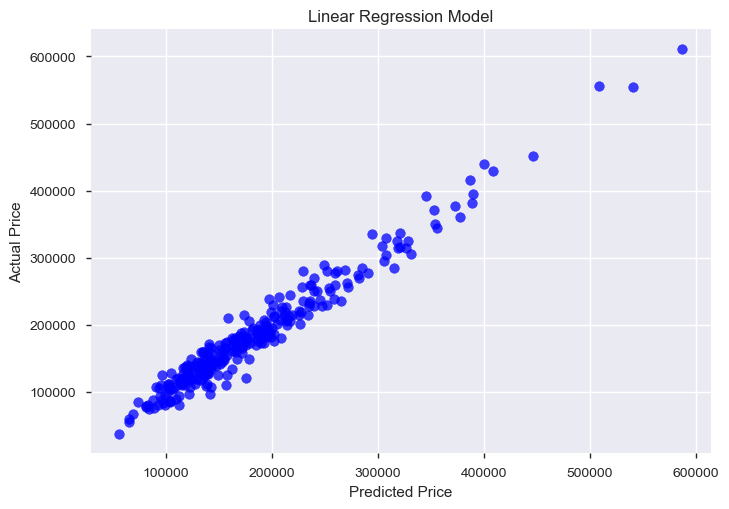

In [44]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')

In [47]:
submit.to_csv('submission.csv', index=False)